#Defining the Question


As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. dataset description is as follows:

## Data Features
* Id
*price  - Price of the house
*bedrooms - Number of Bedrooms
*bathrooms - Number of Bathrooms
*sqft_living - Square feet area of living area
*sqft_lot  - Square feet area of parking Layout
*floors - Number of Floors
*waterfront - Whether waterfront is there or not
*view - Number of Views
*grade - Grades
*sqft_above
*sqft_basement - Square feet area off basement
*yr_built - Year the house is built
*yr_renovated - Year the house is renovated
*zipcode - zipcode os the house
*lat : Latitude of the house
*lon : Longitude of the house
*sqft_living15
*sqft_lot15

 ## a) Specifying the Question

A prediction house prices using the Quantile and Regularization based regression models




## b) Defining the Metric for Success

* Clean dataset
* Multiple Linear Regression model
* Quantile Regression model
* Ridge Regression model
* Lasso Regression model
* Elastic Net Regression mode


## c) Understanding the context

perform modeling using the given regression techniques then evaluate their performance.**bold text**



## d) Recording the Experimental Design

* Data preparation
* Data analysis
* Data modeling


## e) Data Relevance
The data was appropriate for the regression analysis that was needed.



# Reading the Data


In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Loadng dataset
df = pd.read_csv('/content/Independent Project Week 7 - house_data (2).csv')

In [3]:
# previewing dataset
df.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [4]:
# previewing the last 3 rows
df.tail(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
# checking the shape of our dataset
df.shape

(21613, 20)

In [6]:
# checking the info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# Data cleaning

In [7]:
df.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [8]:
# dropping unnecessary columns
df.drop(['id','zipcode','lat','long'],axis=1,inplace=True)

In [9]:
# Checking outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Consistency


In [10]:
# Checking for duplicates
df.duplicated().sum()

6

In [11]:
# Dropping duplicates
df.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [12]:
# checking null values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis


### Measures of central tendancy



In [13]:
# checking for mean, standard deviation,minimum and maximum values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


In [14]:
#median for numeric variables
d1 = df.median().sort_values(ascending=False)
d1

price            450000.00
sqft_lot15         7620.00
sqft_lot           7618.00
yr_built           1975.00
sqft_living        1910.00
sqft_living15      1840.00
sqft_above         1560.00
grade                 7.00
condition             3.00
bedrooms              3.00
bathrooms             2.25
floors                1.50
yr_renovated          0.00
sqft_basement         0.00
view                  0.00
waterfront            0.00
dtype: float64

In [15]:
#skew for numeric variables
d1 = df.skew().sort_values(ascending=False)
d1

sqft_lot         13.060019
waterfront       11.385108
sqft_lot15        9.506743
yr_renovated      4.549493
price             4.021716
view              3.395750
bedrooms          1.974300
sqft_basement     1.577965
sqft_living       1.471555
sqft_above        1.446664
sqft_living15     1.108181
condition         1.032805
grade             0.771103
floors            0.616177
bathrooms         0.511108
yr_built         -0.469805
dtype: float64

In [16]:
#kurt for numeric variables
d1 = df.kurt().sort_values(ascending=False)
d1

sqft_lot         285.077820
sqft_lot15       150.763110
waterfront       127.632494
bedrooms          49.063653
price             34.522444
yr_renovated      18.701152
view              10.893022
sqft_living        5.243093
sqft_above         3.402304
sqft_basement      2.715574
sqft_living15      1.597096
bathrooms          1.279902
grade              1.190932
condition          0.525764
floors            -0.484723
yr_built          -0.657408
dtype: float64

In [17]:
#variance for numeric variables
d1 = df.var().sort_values(ascending=False)
d1

price            1.349550e+11
sqft_lot         1.715659e+09
sqft_lot15       7.455182e+08
sqft_living      8.435337e+05
sqft_above       6.857347e+05
sqft_living15    4.697612e+05
sqft_basement    1.958727e+05
yr_renovated     1.613462e+05
yr_built         8.627973e+02
grade            1.381703e+00
bedrooms         8.650150e-01
bathrooms        5.931513e-01
view             5.872426e-01
condition        4.234665e-01
floors           2.915880e-01
waterfront       7.485226e-03
dtype: float64

<Figure size 1800x1200 with 0 Axes>

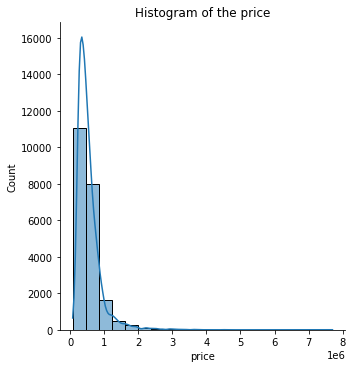

In [18]:
plt.figure(figsize=(12,8),dpi=150);
sns.displot(df['price'],bins=20,kde=True);
plt.title('Histogram of the price')
plt.show();

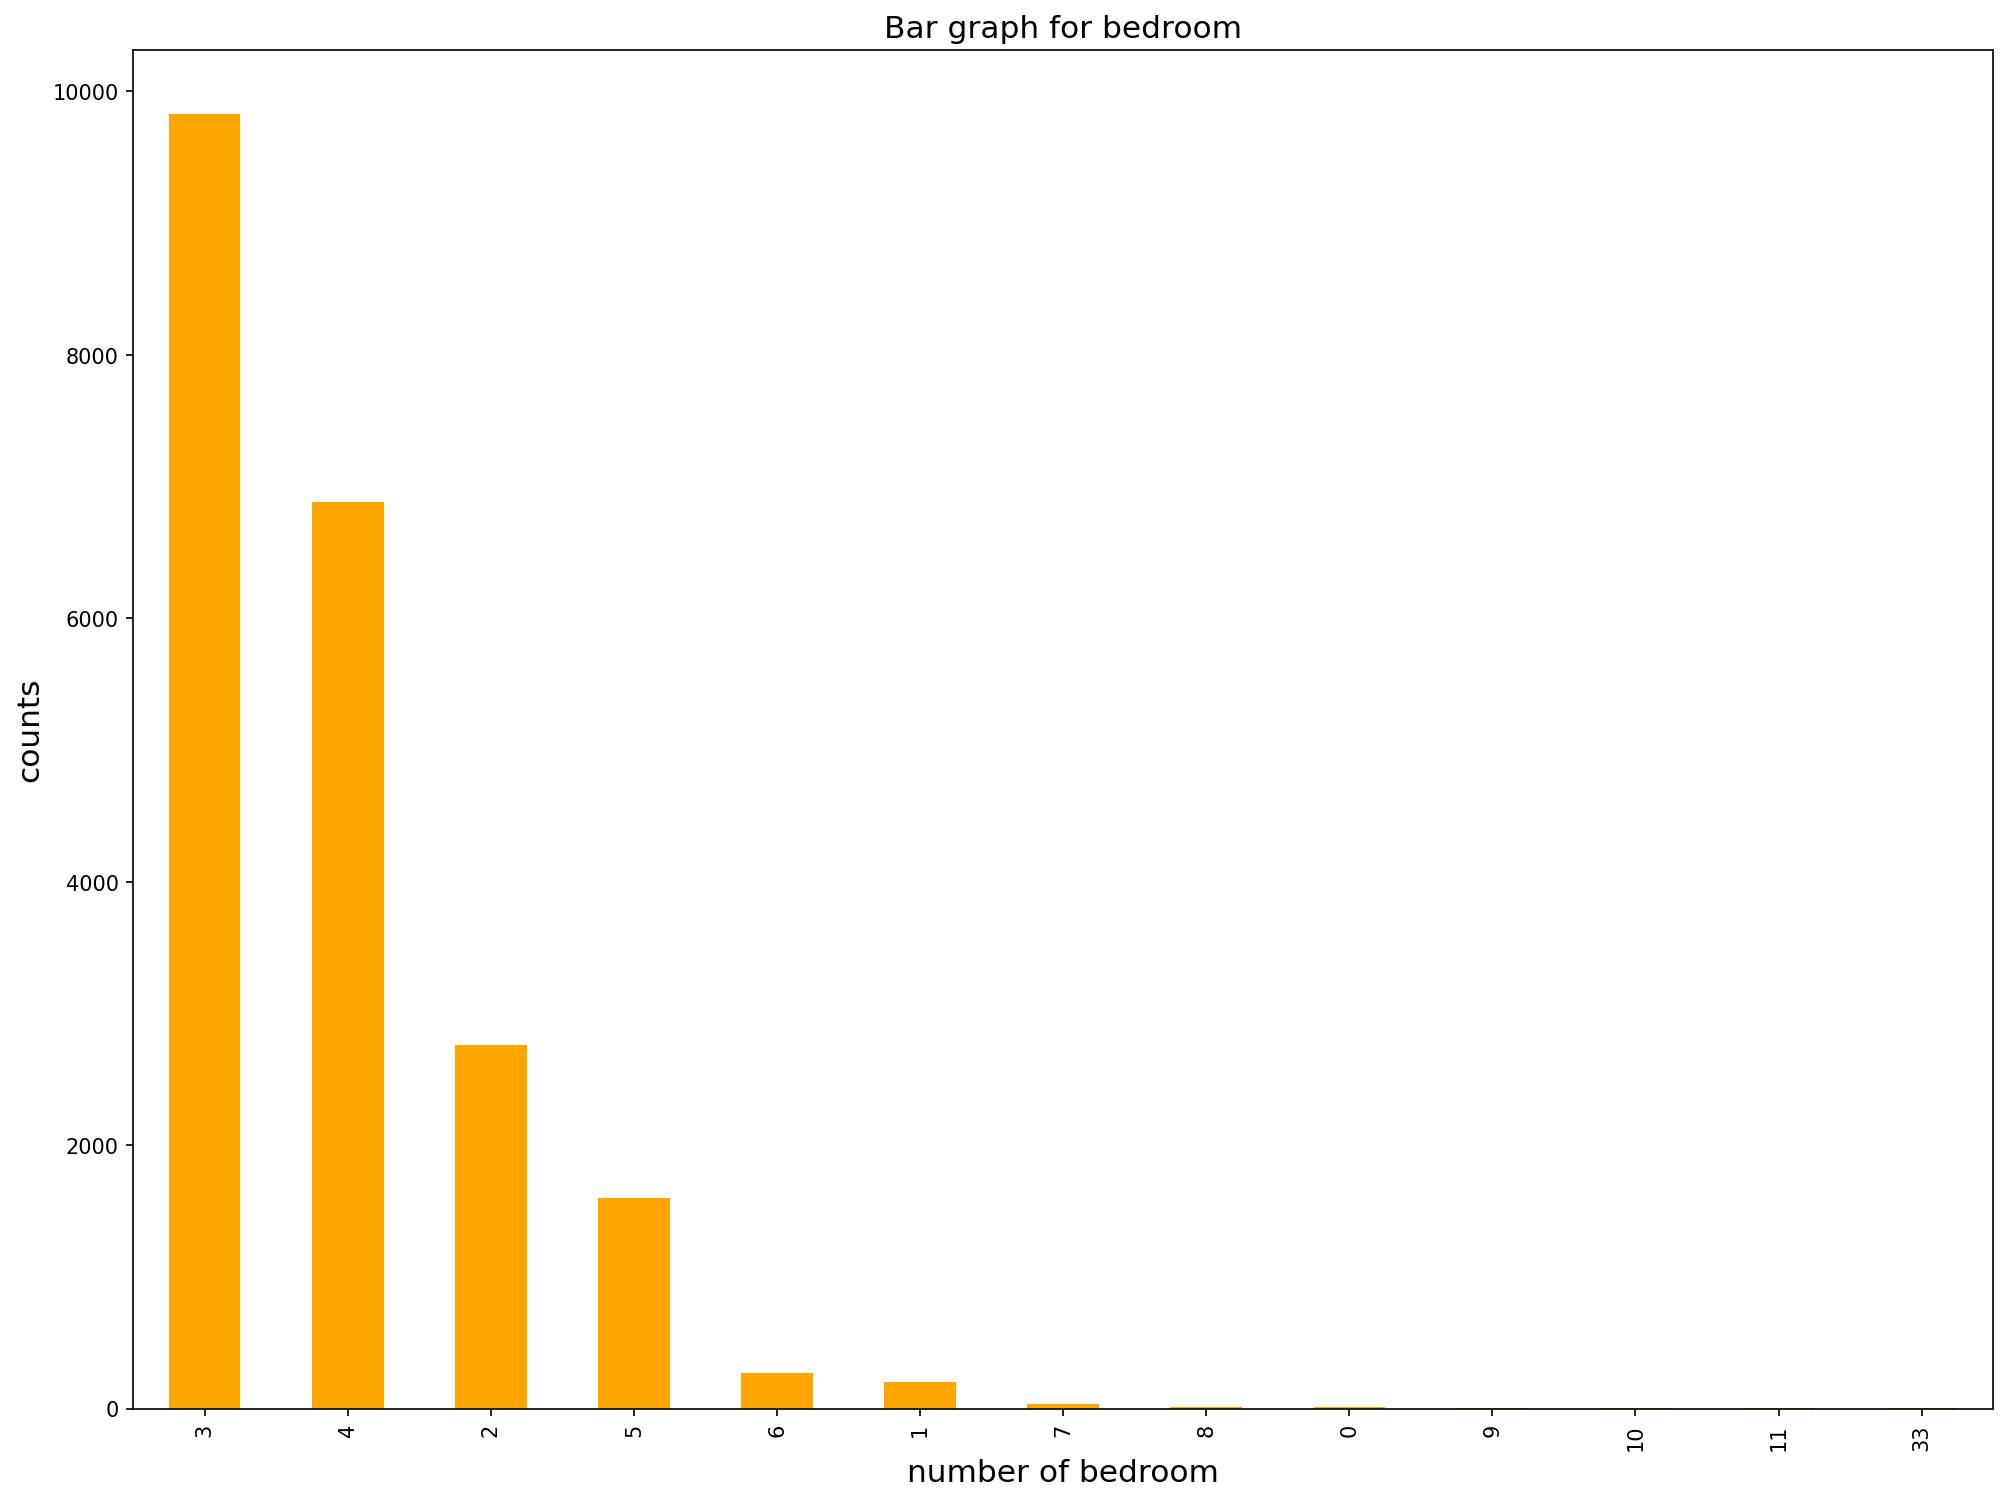

In [19]:
# plotting  bargraph for bedroom
plt.figure(figsize=(16,12),dpi=150)
df['bedrooms'].value_counts().plot(kind='bar',color="orange")
plt.xlabel('number of bedroom',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.title('Bar graph for bedroom',fontsize=15)
plt.show()

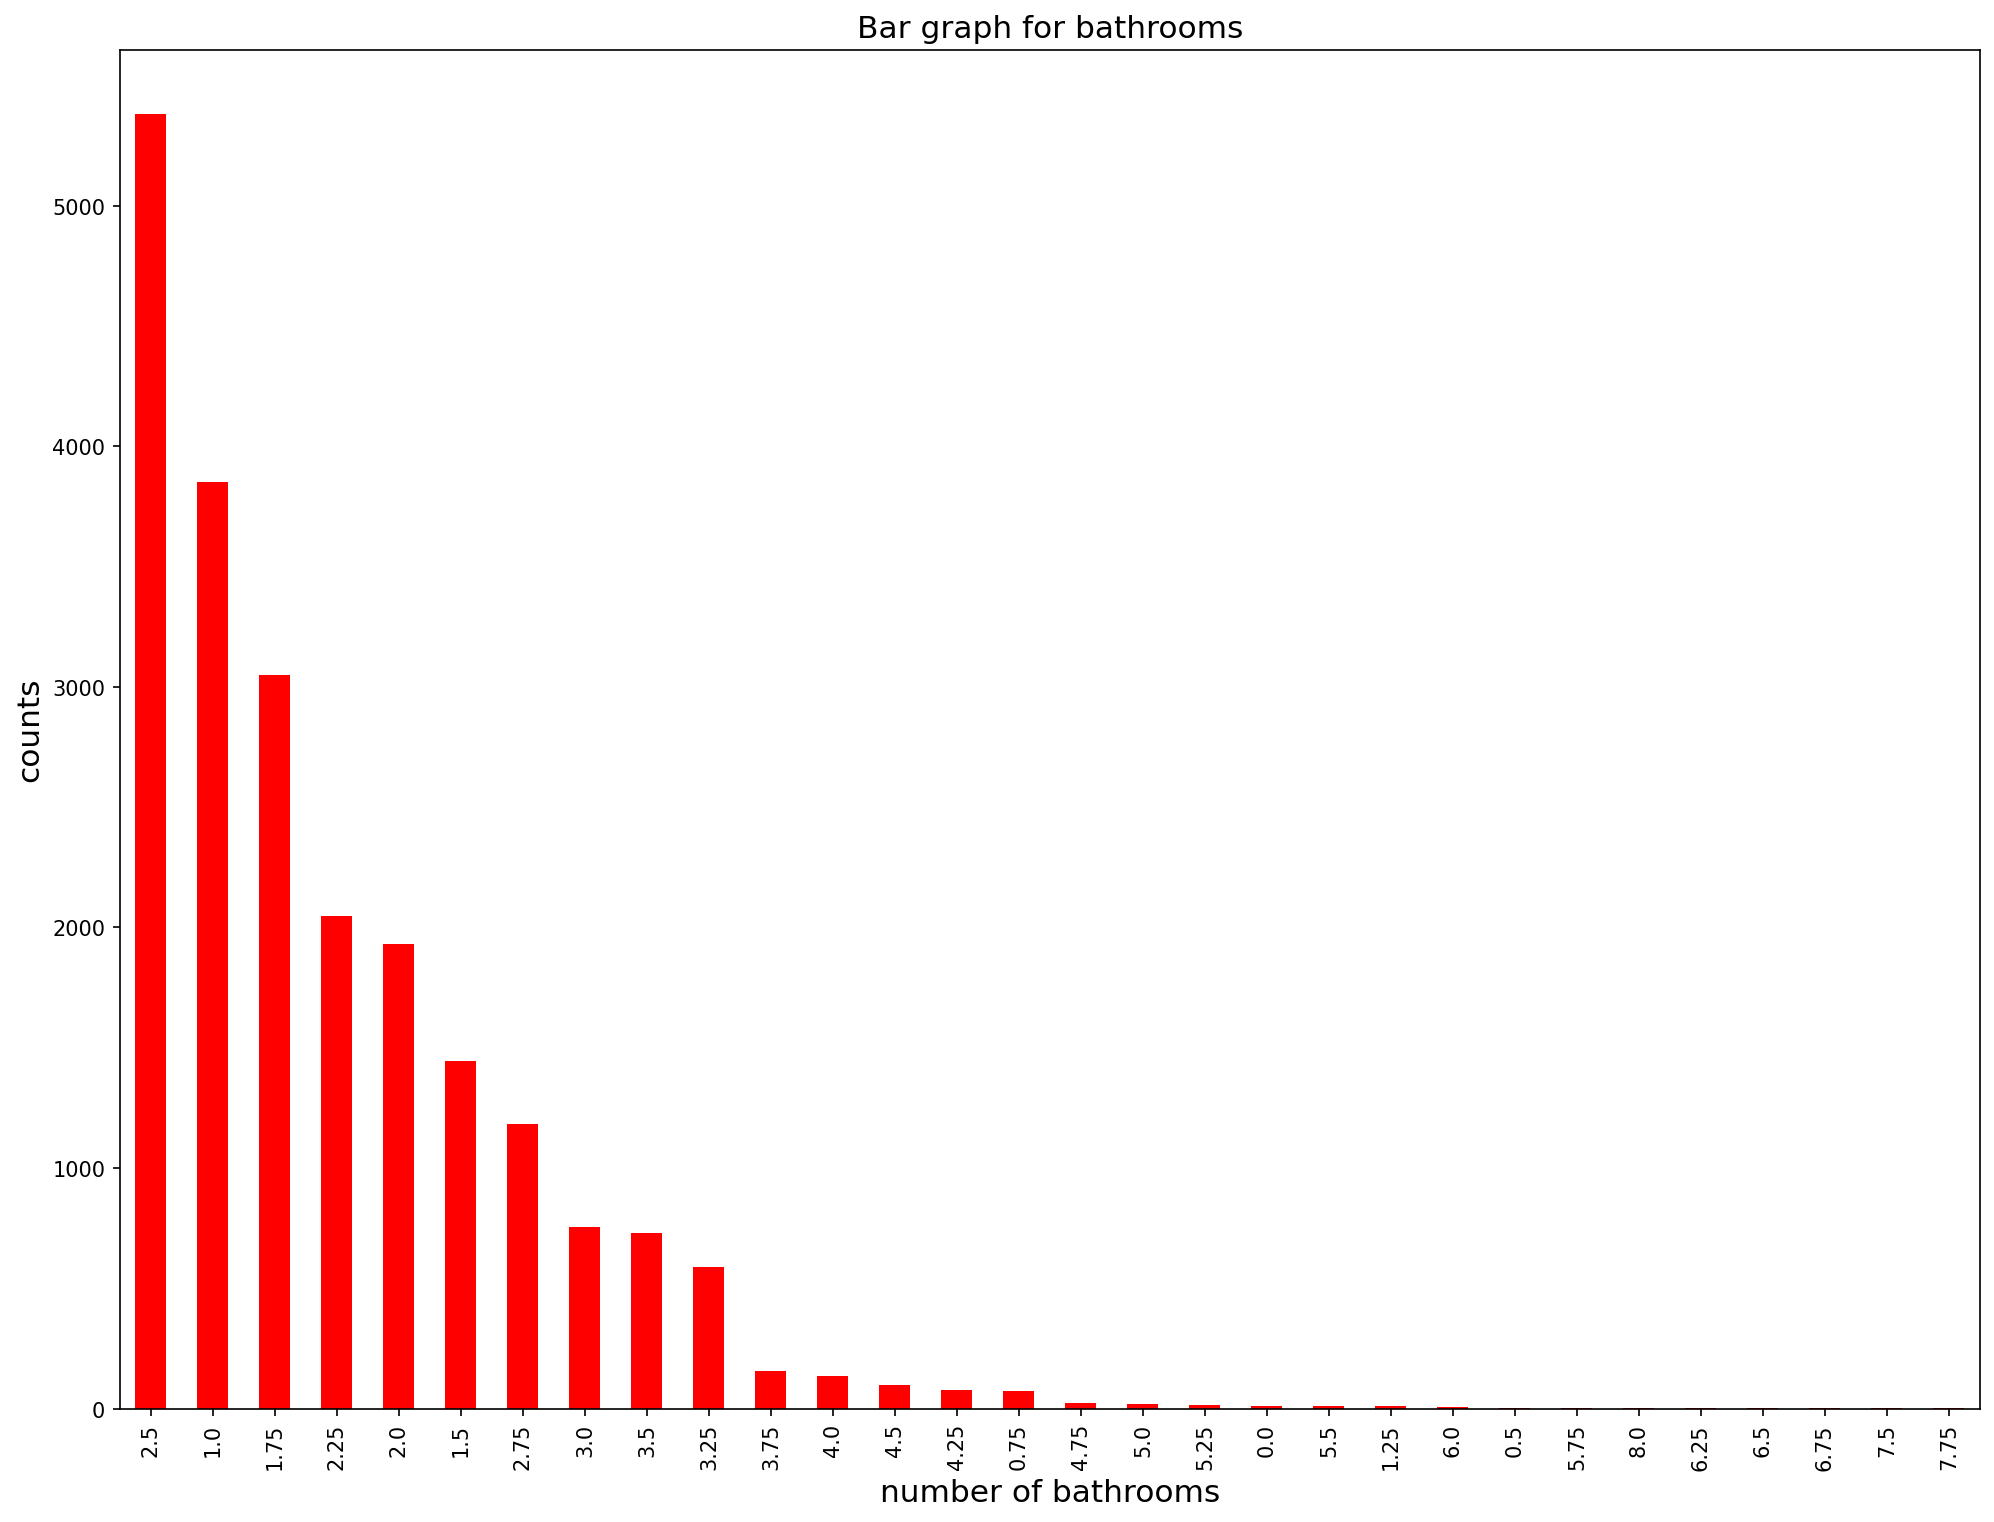

In [20]:
# plotting bargraph for bathrooms
plt.figure(figsize=(16,12),dpi=150)
df['bathrooms'].value_counts().plot(kind='bar',color="red")
plt.xlabel('number of bathrooms',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.title('Bar graph for bathrooms',fontsize=15)
plt.show()

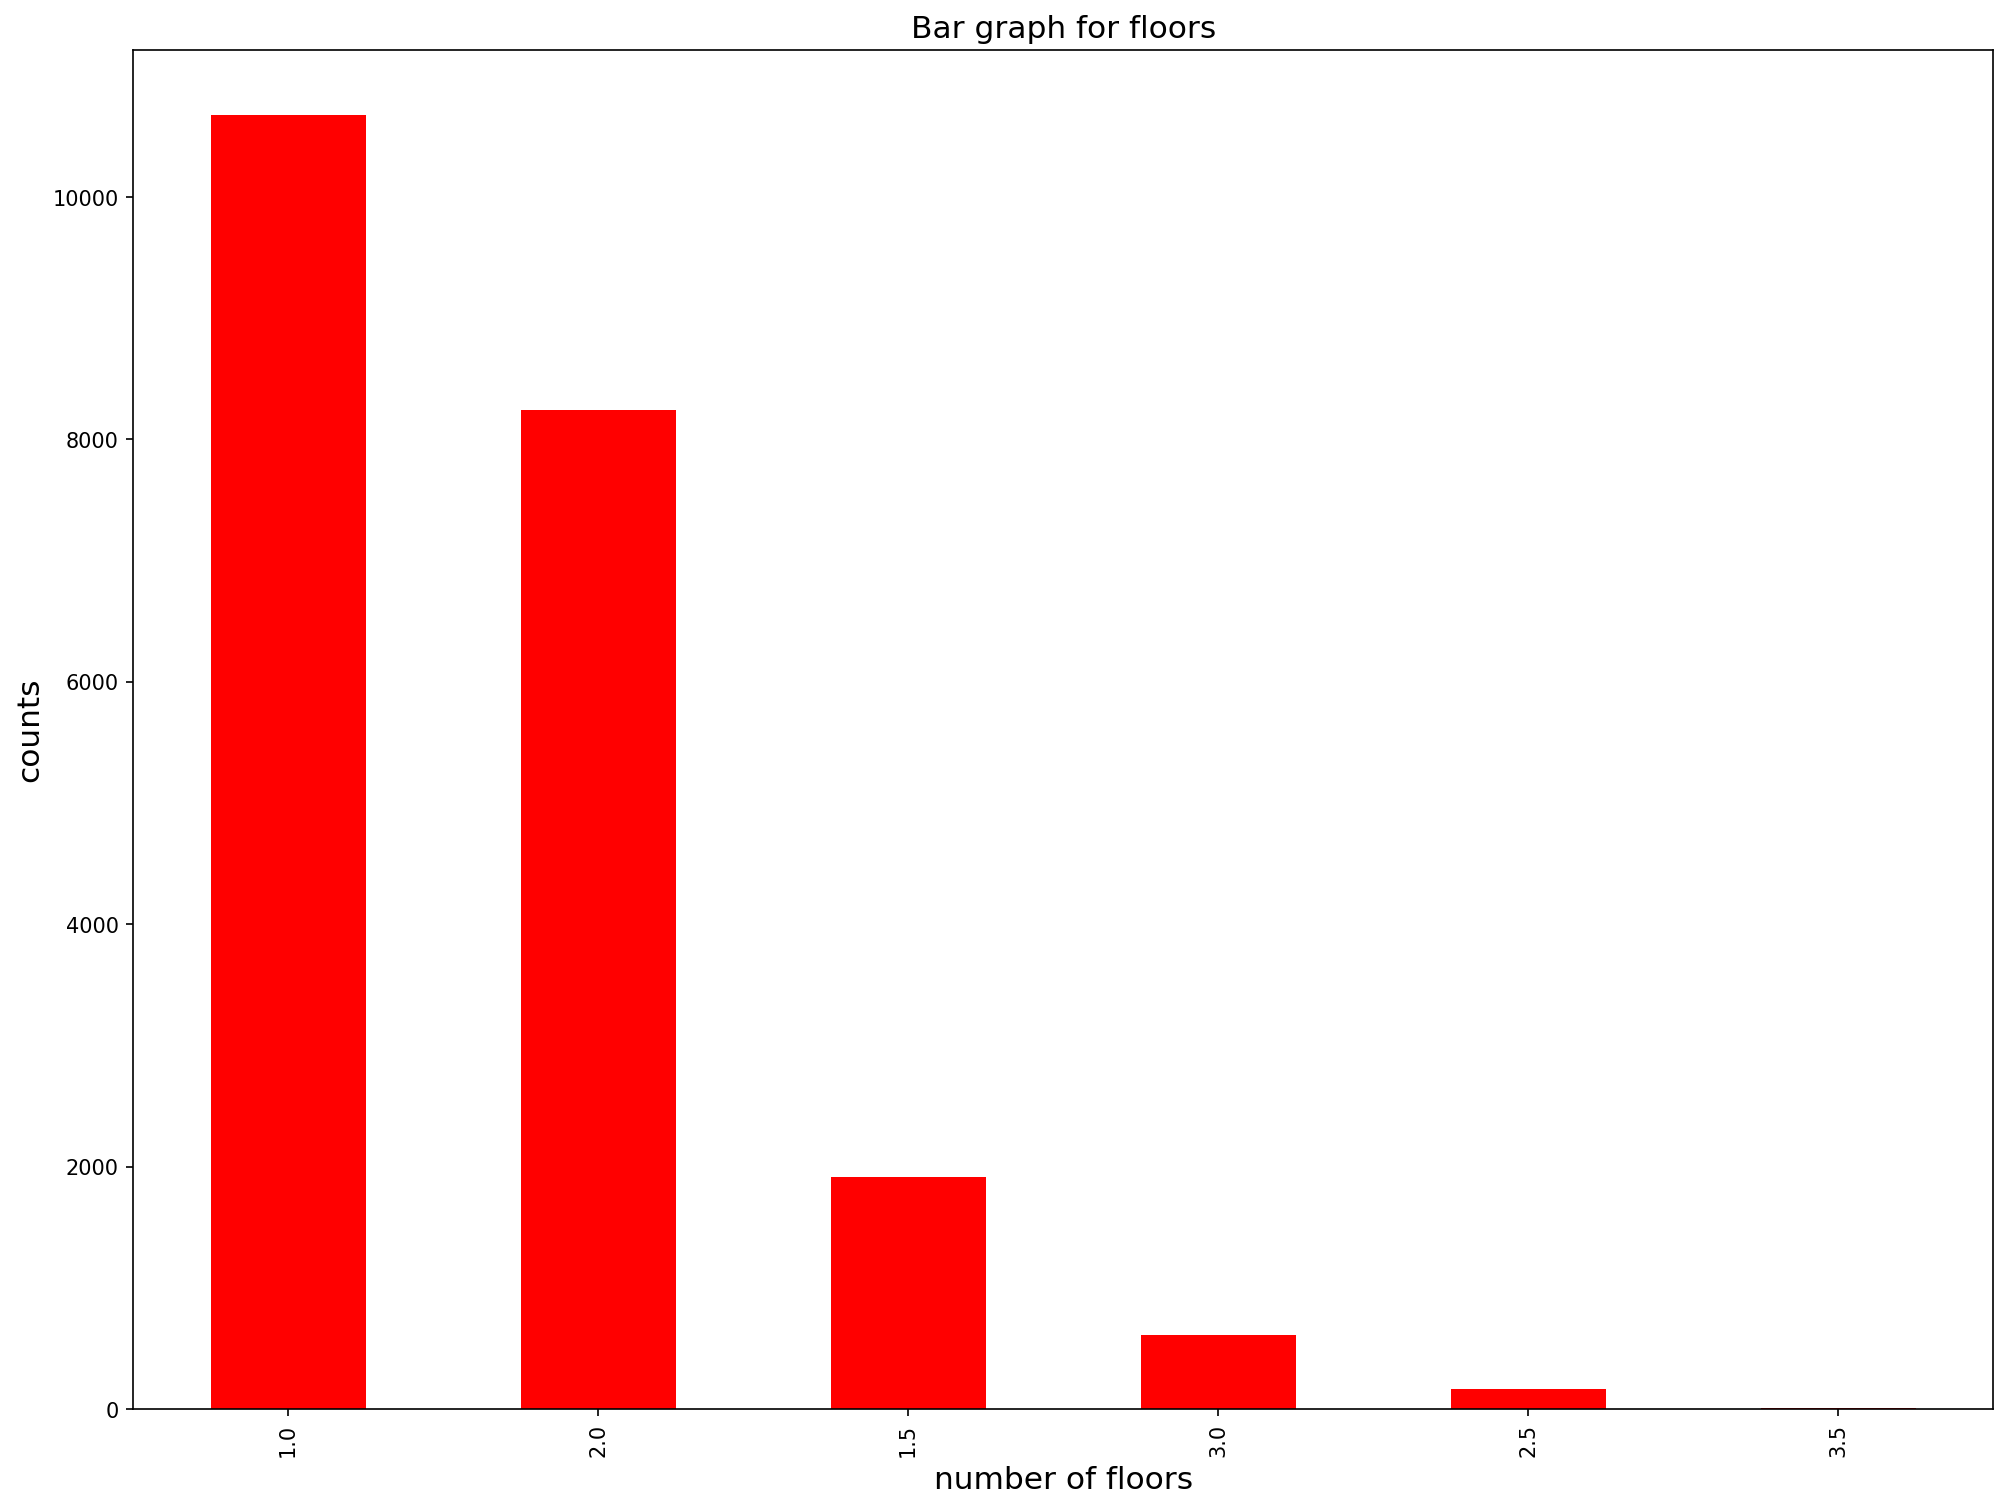

In [21]:
plt.figure(figsize=(16,12),dpi=150)
df['floors'].value_counts().plot(kind='bar',color="red")
plt.xlabel('number of floors',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.title('Bar graph for floors',fontsize=15)
plt.show()

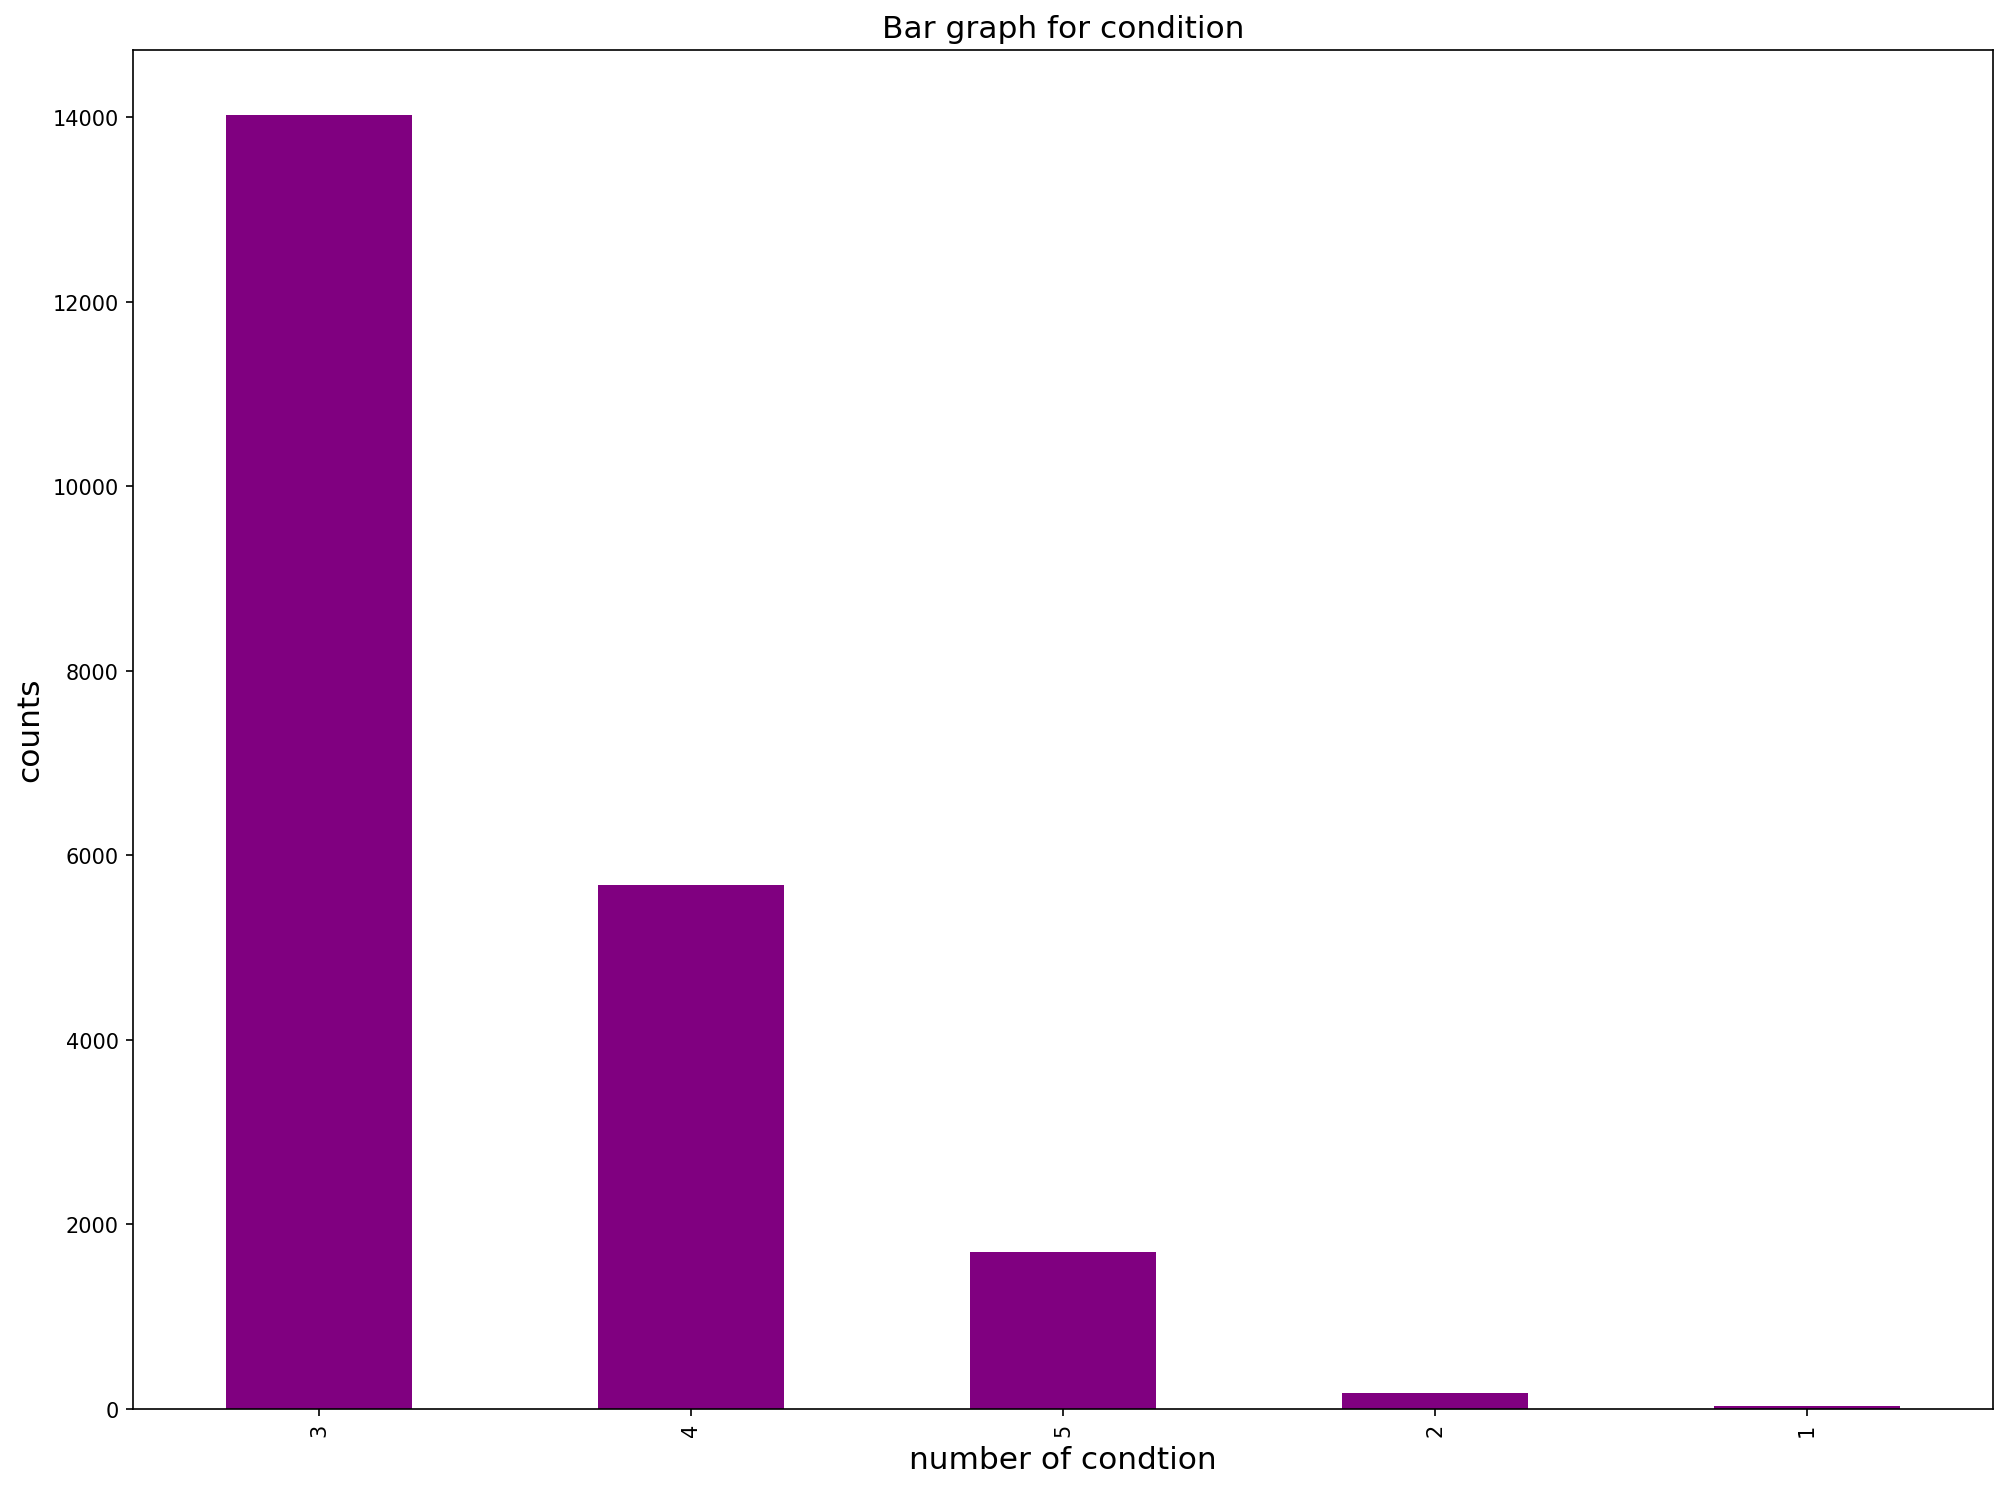

In [22]:
plt.figure(figsize=(16,12),dpi=150)
df['condition'].value_counts().plot(kind='bar',color="purple")
plt.xlabel('number of condtion',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.title('Bar graph for condition',fontsize=15)
plt.show()

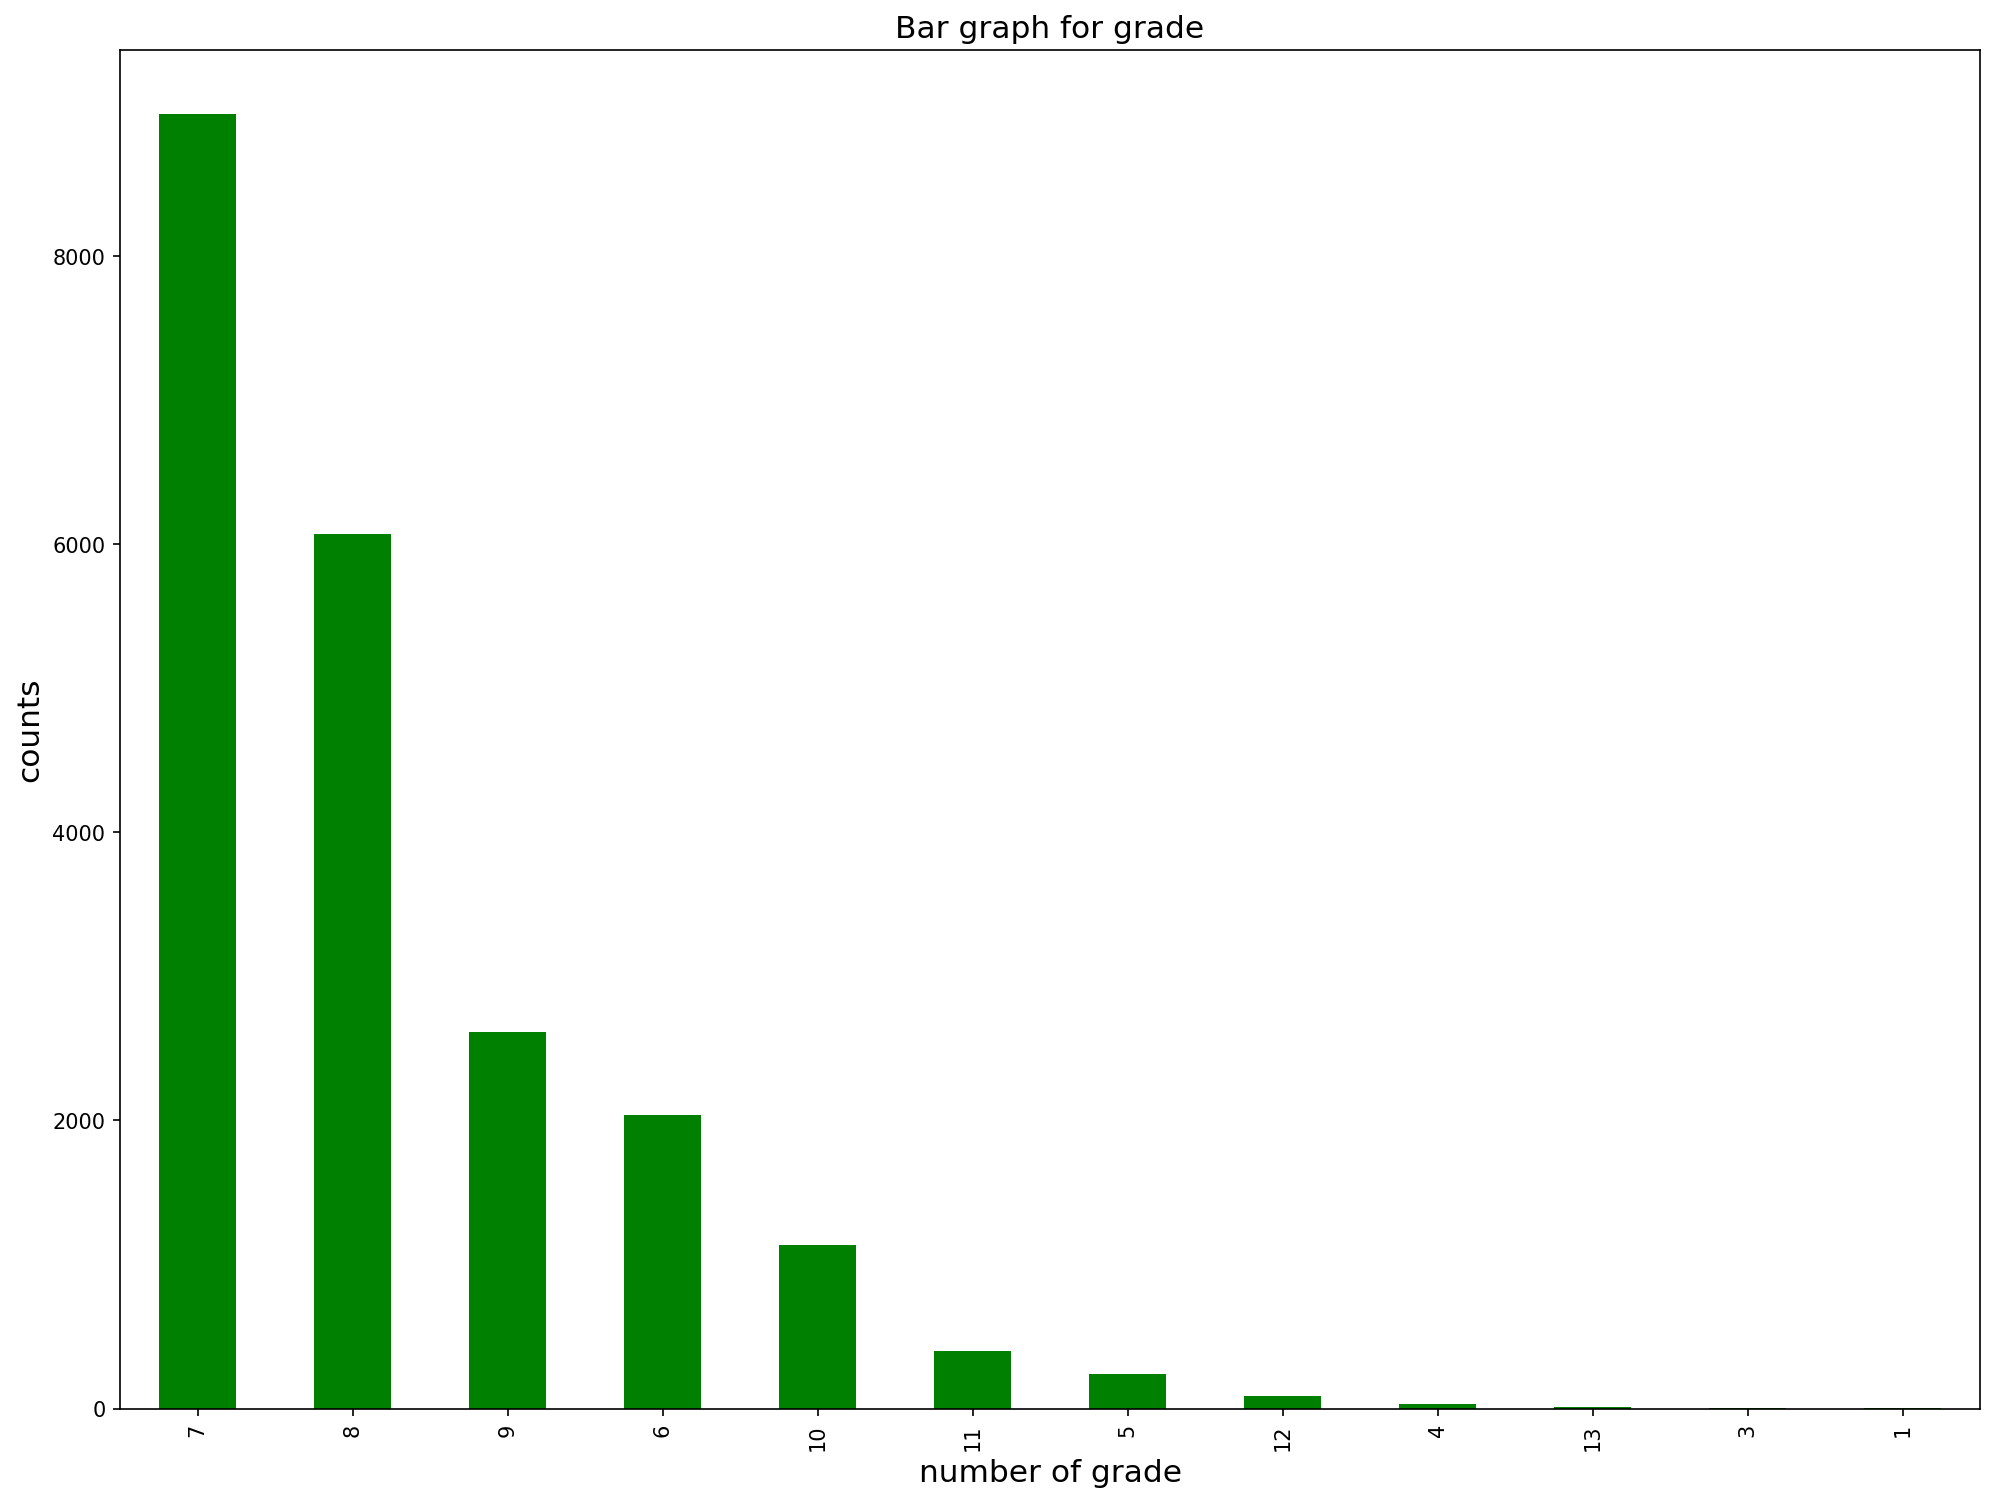

In [23]:
plt.figure(figsize=(16,12),dpi=150)
df['grade'].value_counts().plot(kind='bar',color="green")
plt.xlabel('number of grade',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.title('Bar graph for grade',fontsize=15)
plt.show()

 Observations

 * Most of the houses owned by the  company are three bedroomed.
* Most of the houses owned by the company have 3 bathrooms.
* Most of the houses have one floor.
* Most of their houses are grade 7.

## Bivariate 

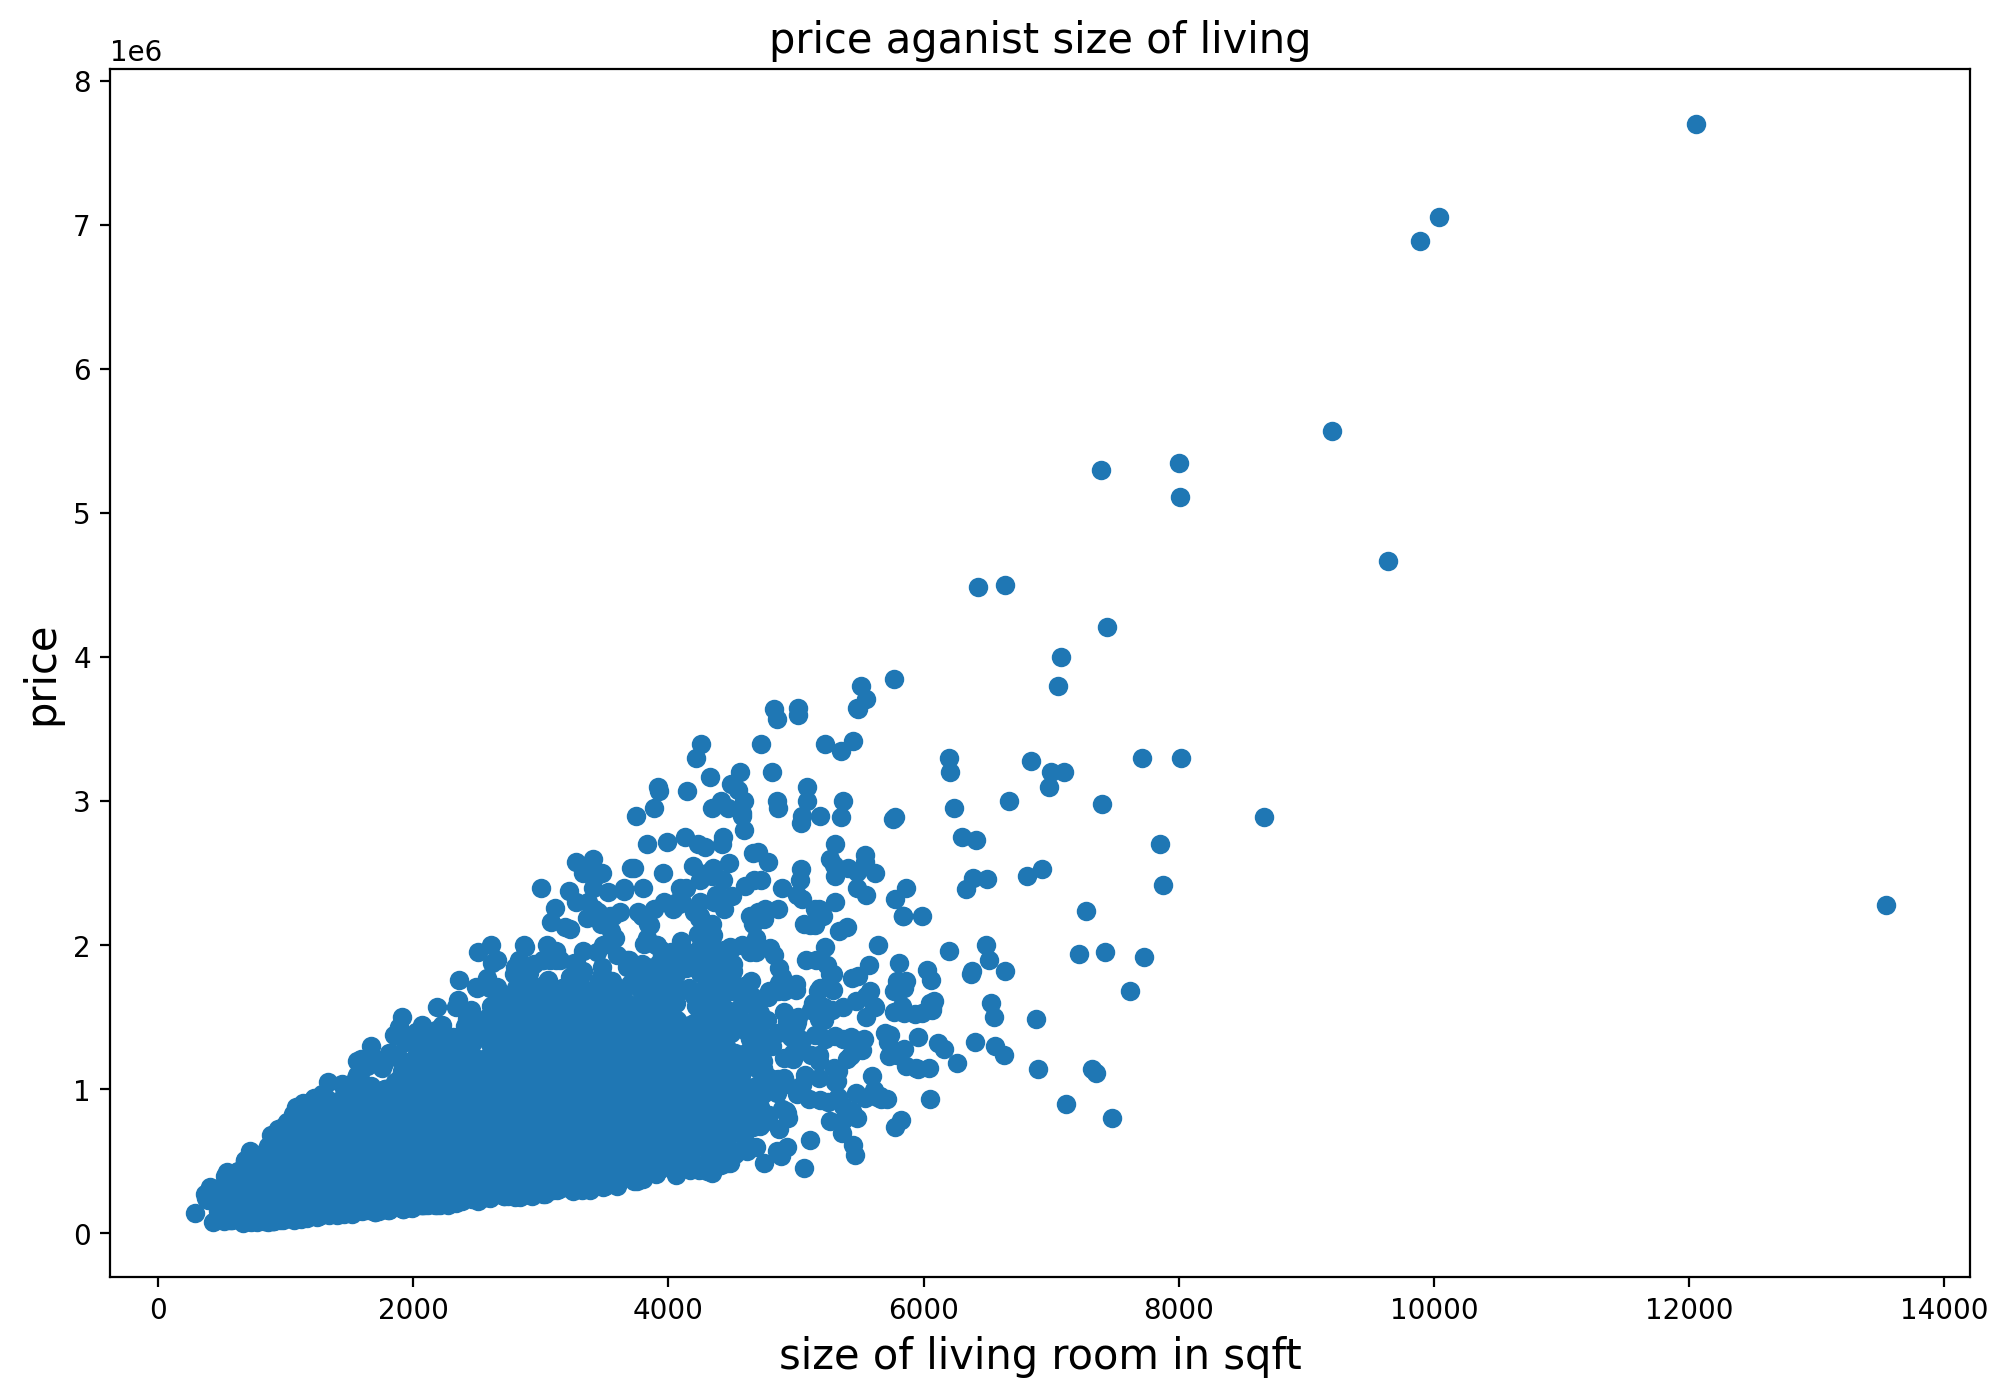

In [24]:
plt.figure(figsize=(12,8),dpi=200)
plt.scatter(y=df['price'],x=df['sqft_living'])
plt.xlabel('size of living room in sqft',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.title('price aganist size of living',fontsize=15)
plt.show()

 We can see clearly that price increases as the size of the living room increases

<Figure size 2400x1600 with 0 Axes>

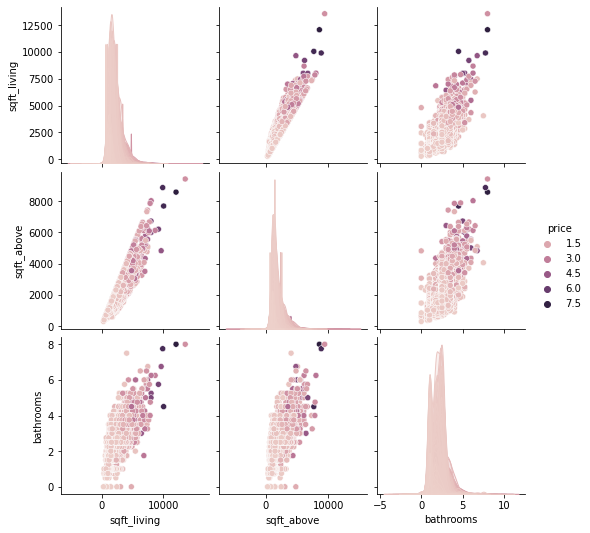

In [25]:
# pairplot
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,8),dpi=200)
columns = ['price','sqft_living','sqft_above','bathrooms']
sns.pairplot(data=df[columns],hue='price')
plt.show()

From the pairplot we can see that when the features increases , the price increases


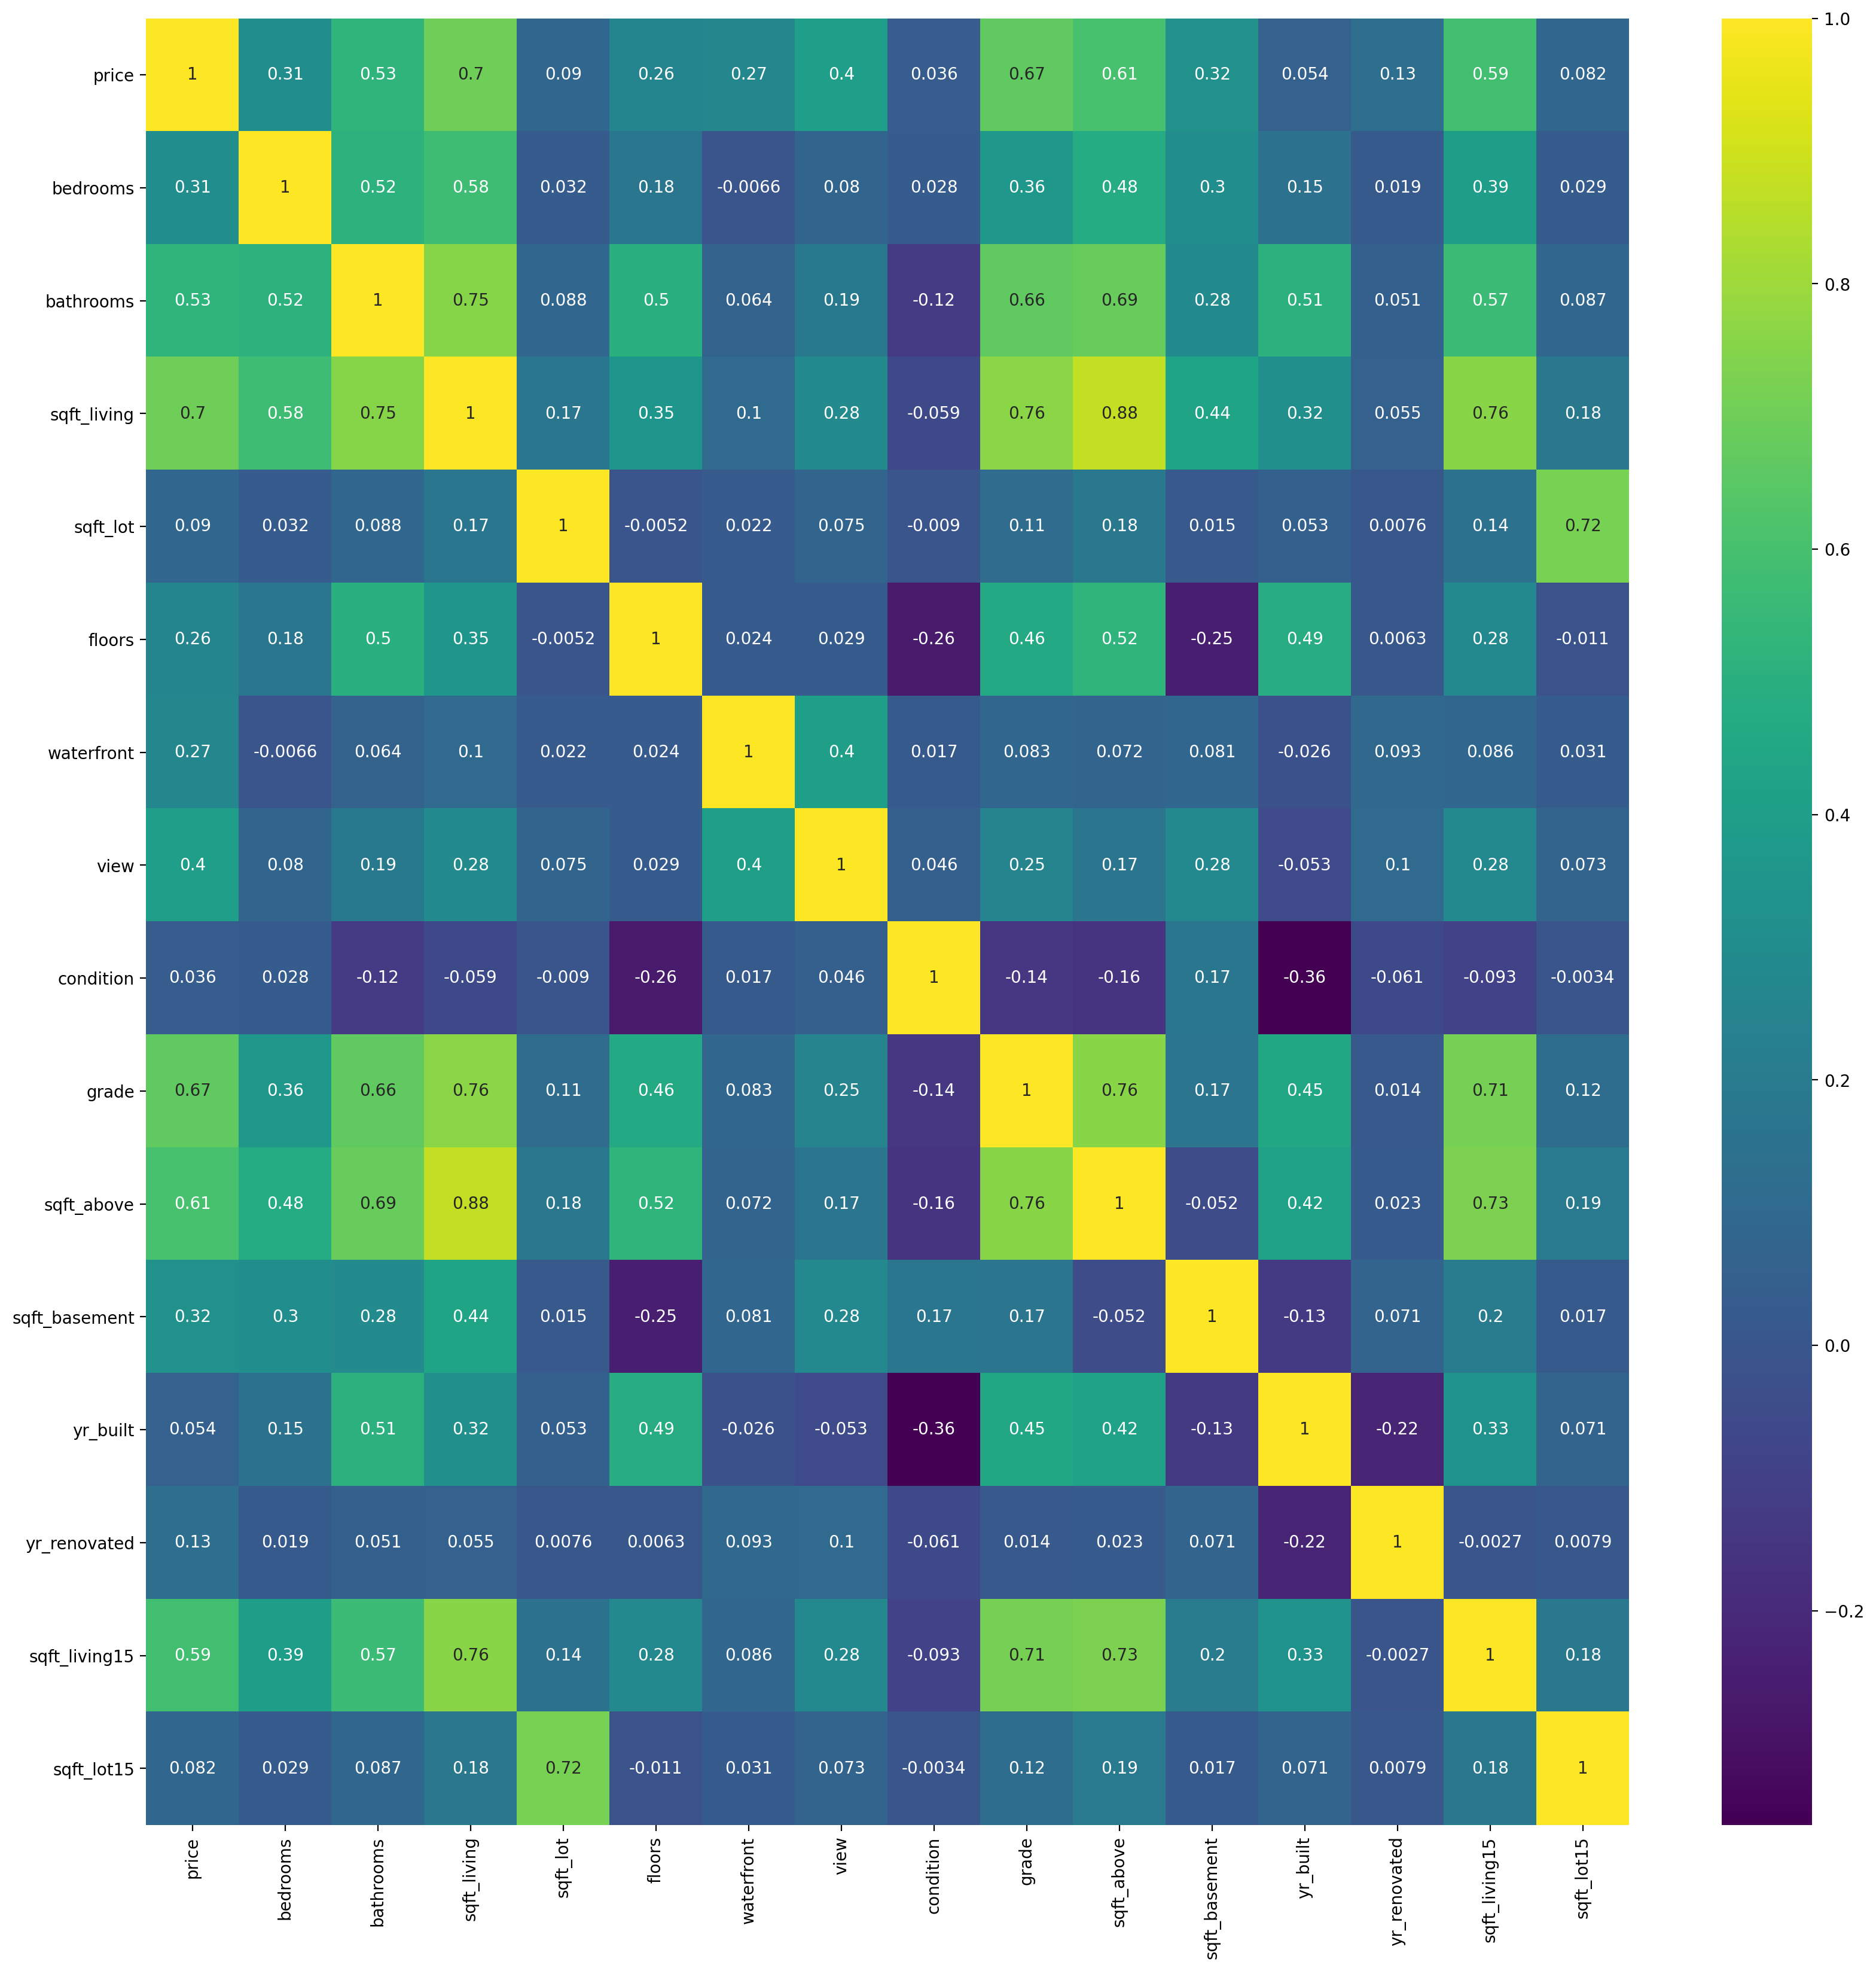

In [26]:
plt.figure(figsize=(20,20),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()


# Detecting multicollinearity

In [27]:
D = df.drop('price',axis=1)
cor = D.corr()
cor

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,0.731870,0.194050



The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above

## VIF score to detect multicollinearity for the dataset



In [28]:
#dataframe with the inverse of the correlations matrix for housing data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(cor.values), index = cor.index, columns=cor.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.644100,-0.460756,-1.932328e-01,0.044613,0.070495,0.061553,0.117238,-0.065090,0.326360,-7.176432e-01,-3.847677e-01,0.092786,0.039624,0.012394,0.082102
bathrooms,-0.460756,3.347865,-5.061361e+00,-0.019235,-0.681459,0.009193,-0.038569,-0.136328,-0.288383,3.311671e+00,1.355375e+00,-0.916265,-0.257377,0.096078,0.076647
sqft_living,-0.188526,-5.065936,-3.387473e+13,-0.127235,0.512772,0.455683,-0.603525,-0.353205,-0.765455,3.054236e+13,1.632343e+13,1.666205,0.065419,-0.983304,-0.194077
sqft_lot,0.044613,-0.019235,-1.289607e-01,2.088121,0.074269,0.028201,-0.051921,0.019180,-0.006188,-1.190643e-01,4.047547e-02,0.026167,0.012555,0.127203,-1.474750
floors,0.070495,-0.681459,5.124052e-01,0.074269,1.931951,-0.003745,-0.063278,0.132731,-0.326791,-8.992036e-01,3.159147e-01,-0.301643,-0.057515,0.358900,0.101125
waterfront,0.061553,0.009193,4.561069e-01,0.028201,-0.003745,1.203090,-0.493279,-0.015109,0.047894,-5.209180e-01,-2.233522e-01,-0.021863,-0.065741,0.057360,-0.016921
view,0.117238,-0.038569,-6.031685e-01,-0.051921,-0.063278,-0.493279,1.404261,-0.008449,-0.184212,5.909546e-01,1.933027e-02,0.198828,-0.035142,-0.264402,0.001930
condition,-0.065090,-0.136328,-3.541943e-01,0.019180,0.132731,-0.015109,-0.008449,1.221646,-0.016421,3.514290e-01,9.928781e-02,0.472716,0.194776,0.036010,-0.037954
grade,0.326360,-0.288383,-7.635365e-01,-0.006188,-0.326791,0.047894,-0.184212,-0.016421,3.234590,-7.943214e-01,-1.871477e-01,-0.397215,-0.040709,-0.828841,0.120063
sqft_above,-0.715469,3.308827,3.054236e+13,-0.120552,-0.899655,-0.520458,0.590873,0.350499,-0.792198,-2.753782e+13,-1.471765e+13,-1.155516,-0.081232,-0.724364,-0.038868


In [29]:
#removing columns with negative  VIF
cor =  cor.corr()
pd.DataFrame(np.linalg.inv(cor.values), index = cor.index, columns=cor.columns)


,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,4.496695,-4.613727,0.937227,1.289254,1.018885,1.534339,3.288220,1.029770,5.363544,2.577603,-1.271806,0.984458
bathrooms,-4.613727,11.855931,-0.689478,-1.522547,-0.227726,-1.287142,-2.490761,-4.951710,-5.983261,-2.282458,0.141073,0.028491
sqft_lot,0.937227,-0.689478,8.386865,0.597969,0.829355,0.656322,2.607133,-0.885938,3.272908,1.775970,0.759692,-6.749645
floors,1.289254,-1.522547,0.597969,4.706371,0.402949,1.040535,2.394883,-2.604731,0.607609,1.046310,1.487575,0.737852
waterfront,1.018885,-0.227726,0.829355,0.402949,2.279006,-0.324380,2.359207,-0.056076,2.572669,1.509504,0.035863,0.456116
view,1.534339,-1.287142,0.656322,1.040535,-0.324380,2.789673,2.766314,-0.755510,4.204092,1.915752,-0.619923,0.752039
condition,3.288220,-2.490761,2.607133,2.394883,2.359207,2.766314,10.595396,-1.071200,11.989383,6.440566,0.098803,1.672650
grade,1.029770,-4.951710,-0.885938,-2.604731,-0.056076,-0.755510,-1.071200,16.086693,-1.816842,-0.748249,-9.649654,0.729523
yr_built,5.363544,-5.983261,3.272908,0.607609,2.572669,4.204092,11.989383,-1.816842,19.427350,8.820321,0.279026,1.513985
yr_renovated,2.577603,-2.282458,1.775970,1.046310,1.509504,1.915752,6.440566,-0.748249,8.820321,5.482904,0.213872,1.105421


## Multiple Linear Regression model

In [30]:
# separating features and label
X = df.drop(columns=['sqft_living', 'sqft_above', 'sqft_basement','price'])
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making Predictions
# 
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

print("For the model excluding sqft_above only:")
print("          The R2 score is:", r2_score(y_test, y_pred))
print('          Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

For the model excluding sqft_above only:
          The R2 score is: 0.6318869184553764
          Root Mean Squared Error: 224259.71048634197


## Ridge regression

In [ ]:

#importing required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
!pip install pydataset
from pydataset import data

In [32]:
# Data Preparation
# Setting up our X and y datasets
#
X = df.drop('price',axis=1).values
y = df['price'].values

In [33]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

46722106361.99094


In [34]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [35]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

47378939173.13878

In [36]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

46729923240.01835


In [37]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 109.33937825817702,
 'bedrooms': 45769.02689271932,
 'condition': 119825.78117062595,
 'floors': 579131.8850350841,
 'grade': 51.54903682235454,
 'price': -39338.46999528524,
 'sqft_above': 57.79034161311938,
 'sqft_basement': -3572.820762579031,
 'sqft_living': -0.0018677648113225587,
 'sqft_living15': -0.5504466554157261,
 'sqft_lot': 26894.06313924224,
 'view': 19535.27564942823,
 'waterfront': 43299.93436269667,
 'yr_built': 10.167037422676941,
 'yr_renovated': 24.85723288304871}

In [38]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)

Ridge model Root Mean Squared Error: 224268.90316305403
The R2 score for the ridge model is: 0.6318567390361596


The R2 score of 63%



## Lasso regression

In [39]:
# Splitting our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [40]:
from sklearn.linear_model import Lasso

In [41]:
# Creating lasso object
lasso = Lasso()
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [42]:
# Fitting models and getting RMSE

gridlasso.fit(X_train, y_train) 
y_pred = gridlasso.predict(X_test)
d = r2_score(y_test,y_pred)

In [43]:
print("The RMSE for the lasso model:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The R2 score for the lasso model is:",d)

The RMSE for the lasso model: 213979.96451074324
The R2 score for the lasso model is: 0.6648610079666406


##  Elastic net

In [44]:
from sklearn.linear_model import ElasticNetCV

In [45]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [46]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic', tol=0.01,
             verbose=0)

In [47]:
elastic_model.l1_ratio_

1.0

In [48]:
test_predictions = elastic_model.predict(X_test)

In [49]:
d1 = r2_score(y_test,test_predictions)
print("The RMSE for the lasso model:", np.sqrt(mean_squared_error(y_test,test_predictions)))
print("The R2 score for the lasso model is:",d1)


The RMSE for the lasso model: 251772.66395285036
The R2 score for the lasso model is: 0.5360236041070623


## Quantile regression

In [50]:
#importing the neccessary libraries
from scipy.stats import spearmanr
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [59]:
#PCA with 5 principal components
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X_train)
principalComponentsTest = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
principalDftest = pd.DataFrame(data = principalComponentsTest
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [60]:
# importing the statsmodels library
import statsmodels.formula.api as sm

#creating Principal dataframe for target training dataframe
principalDf['price'] = y_train
# creating a startsmodel formula using principal components and target training dataframe
mod = sm.quantreg('price ~ PrincComp_1 + PrincComp_2 + PrincComp_3 + PrincComp_4 + PrincComp_5', principalDf)
#fitting the QUantile Regression model using the quantreg package
res = mod.fit(q=.5)
#results summary 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.1791
Model:                       QuantReg   Bandwidth:                   3.474e+04
Method:                 Least Squares   Sparsity:                    4.828e+05
Date:                Sat, 24 Jul 2021   No. Observations:                17290
Time:                        16:06:17   Df Residuals:                    17284
                                        Df Model:                            5
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     4.38e+05   1835.856    238.606      0.000    4.34e+05    4.42e+05
PrincComp_1     1.0004      0.039     25.530      0.000       0.924       1.077
PrincComp_2    -0.0629      0.110     -0.572      0.567      -0.278       0.153
PrincComp_3   174.6443      1.420    123.024   

In [61]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['PrincComp_1']] + res.conf_int().loc['PrincComp_1'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt      intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1  307756.811003  0.615349        0.570172        0.660525
1  0.2  406866.065957  0.637941        0.581175        0.694708
2  0.3  412639.441401  0.687705        0.624906        0.750504
3  0.4  420427.749994  0.831258        0.761814        0.900702
4  0.5  438046.851084  1.000387        0.923580        1.077194
5  0.6  478060.371810  0.627616        0.544679        0.710553
6  0.7  551162.133232  0.738930        0.661117        0.816742
7  0.8  456540.531299  0.653000        0.558333        0.747668
8  0.9  827300.165824  1.059127        0.863501        1.254753


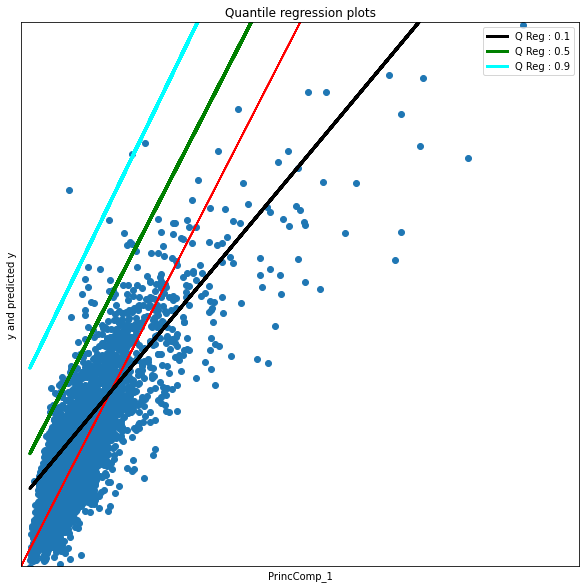

In [62]:
#plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
#scatterplot visualization of predicted values
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.ylim(-1, 2500000)
plt.xlim(-1, 5000000)
plt.plot(y_pred, y_pred, "r")
y_pred3 = models[0].params['Intercept'] + models[0].params['PrincComp_1'] *y_test
plt.plot(y_test, y_pred3, color='black',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['PrincComp_1'] * y_test
plt.plot(y_test, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['PrincComp_1'] * y_test
plt.plot(y_test, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("PrincComp_1")
plt.ylabel("y and predicted y")
plt.title("Quantile regression plots")
plt.legend()

<Figure size 432x288 with 0 Axes>

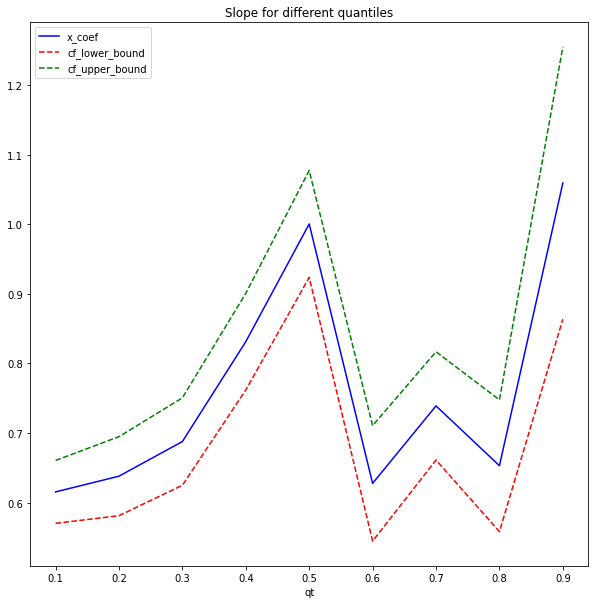

In [63]:
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'],figsize=(10,10))
plt.show()

## Conclusion


Lasso model is the best performing model with R2 scorre of 0.66. Further analysis of data needs be done to further improve the model.


## Follow up questions

* At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.


## Did we have the right data?

* YES

Do we need other data to answer our question?

* NO


Did we have the right question?
* Yes